Back to the main [Index](../index.ipynb) <a id="top"></a>

<div class="jumbotron">
  <h1 class="display-3">Fourth (basic) lesson with Abinit and AbiPy</h1>
  <p class="lead">The H<sub>2</sub> molecule</p> 
  <hr class="my-4">
  <p>This lesson aims at showing how to get the following physical properties, for a metal, and for a surface:

the total energy
the lattice parameter
the relaxation of surface atoms
the surface energy You will learn about the smearing of the Brillouin zone integration, and also a bit about preconditioning the SCF cycle.
This lesson should take about 1 hour and 30 minutes.
</p>
  <p class="lead">
    <a class="btn btn-primary btn-lg" href="#" role="button">Learn more</a>
  </p>
</div>

In [1]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import numpy as np

import warnings 
warnings.filterwarnings("ignore")  # Ignore warnings

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook

# This line tells the notebook to show plots inside of the notebook
%matplotlib notebook

## The convergence study with respect to both number of k points and broadening
[[back to top](#top)]

Note that there is usually a STRONG cross-convergence effect between the number 
of k points and the value of the broadening, tsmear.
The right procedure is: for each value of tsmear, to get the convergence with respect 
to the number of k points, then to compare the k-point converged values for different values of tsmear.

In what follows, we will restrict ourselves to the grids with nkpt=2, 10 and 28.

As usual, we start by writing an helper function to generate the input for the structural relaxation of Al.
The function accepts `tsmear` and another parameter, `nksmall`, that will be used to define the BZ sampling:

In [2]:
from lesson_base4 import relax_input
abilab.print_source(relax_input)

Now we use `relax_input` to generate multiple inputs with different values of `tsmear` and `nksmall`
and we pass the input objects to the Flow constructor.
To keep things as simple as possible, we use independent tasks ...

In [3]:
from lesson_base4 import build_relax_tsmear_nkpts_convflow
abilab.print_source(build_relax_tsmear_nkpts_convflow)

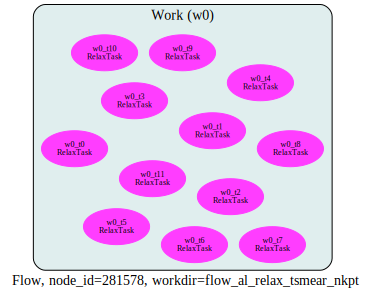

In [4]:
flow = build_relax_tsmear_nkpts_convflow(options=None)
flow.get_graphviz()

In [5]:
for task in flow.iflat_tasks():
    print(task.pos_str, "ngkpt", task.input["ngkpt"], 
          "tsmear", task.input["tsmear"], "occopt", task.input["occopt"])

w0_t0 ngkpt [2 2 2] tsmear 0.01 occopt 4
w0_t1 ngkpt [4 4 4] tsmear 0.01 occopt 4
w0_t2 ngkpt [6 6 6] tsmear 0.01 occopt 4
w0_t3 ngkpt [2 2 2] tsmear 0.02 occopt 4
w0_t4 ngkpt [4 4 4] tsmear 0.02 occopt 4
w0_t5 ngkpt [6 6 6] tsmear 0.02 occopt 4
w0_t6 ngkpt [2 2 2] tsmear 0.03 occopt 4
w0_t7 ngkpt [4 4 4] tsmear 0.03 occopt 4
w0_t8 ngkpt [6 6 6] tsmear 0.03 occopt 4
w0_t9 ngkpt [2 2 2] tsmear 0.04 occopt 4
w0_t10 ngkpt [4 4 4] tsmear 0.04 occopt 4
w0_t11 ngkpt [6 6 6] tsmear 0.04 occopt 4


In [6]:
#abo = abilab.abiopen("flow_al_relax/w0/t0/run.abo")
#print(abo)

In [7]:
#abo.plot();

In [8]:
#hist = abilab.abiopen("flow_al_relax/w0/t0/outdata/out_HIST.nc")
#print(hist)

In [9]:
#hist.plot();

In [10]:
robot = abilab.GsrRobot.from_dir("flow_al_relax_tsmear_nkpt")
robot

Label                      Relpath
-------------------------  ---------------------------------------------------
w0/t0/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t0/outdata/out_GSR.nc
w0/t1/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t1/outdata/out_GSR.nc
w0/t10/outdata/out_GSR.nc  flow_al_relax_tsmear_nkpt/w0/t10/outdata/out_GSR.nc
w0/t11/outdata/out_GSR.nc  flow_al_relax_tsmear_nkpt/w0/t11/outdata/out_GSR.nc
w0/t2/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t2/outdata/out_GSR.nc
w0/t3/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t3/outdata/out_GSR.nc
w0/t4/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t4/outdata/out_GSR.nc
w0/t5/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t5/outdata/out_GSR.nc
w0/t6/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t6/outdata/out_GSR.nc
w0/t7/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t7/outdata/out_GSR.nc
w0/t8/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t8/outdata/out_GSR.nc
w0/t9/outdata/out_GSR.nc   flow_al_relax_tsmear_nkpt/w0/t9/outdata/out_GSR.nc

In [11]:
robot.remap_labels(lambda gsr: "nkpt: %d, tsmear %.2f" % (gsr.nkpt, gsr.tsmear))

OrderedDict([('nkpt: 2, tsmear 0.01', 'w0/t0/outdata/out_GSR.nc'),
             ('nkpt: 10, tsmear 0.01', 'w0/t1/outdata/out_GSR.nc'),
             ('nkpt: 10, tsmear 0.04', 'w0/t10/outdata/out_GSR.nc'),
             ('nkpt: 28, tsmear 0.04', 'w0/t11/outdata/out_GSR.nc'),
             ('nkpt: 28, tsmear 0.01', 'w0/t2/outdata/out_GSR.nc'),
             ('nkpt: 2, tsmear 0.02', 'w0/t3/outdata/out_GSR.nc'),
             ('nkpt: 10, tsmear 0.02', 'w0/t4/outdata/out_GSR.nc'),
             ('nkpt: 28, tsmear 0.02', 'w0/t5/outdata/out_GSR.nc'),
             ('nkpt: 2, tsmear 0.03', 'w0/t6/outdata/out_GSR.nc'),
             ('nkpt: 10, tsmear 0.03', 'w0/t7/outdata/out_GSR.nc'),
             ('nkpt: 28, tsmear 0.03', 'w0/t8/outdata/out_GSR.nc'),
             ('nkpt: 2, tsmear 0.04', 'w0/t9/outdata/out_GSR.nc')])

In [15]:
data = robot.get_dataframe()
print(data.keys())

Index(['formula', 'natom', 'alpha', 'beta', 'gamma', 'a', 'b', 'c', 'volume',
       'abispg_num', 'spglib_symb', 'spglib_num', 'energy', 'pressure',
       'max_force', 'ecut', 'pawecutdg', 'tsmear', 'nkpt', 'nsppol', 'nspinor',
       'nspden'],
      dtype='object')


First of all, let's sort our rows first by `nkpt` and then by `tsmear` inside each `nkpt` group so that 
we have print the table in a nice format:

In [17]:
data = data[["nkpt", "tsmear", "a", "alpha", "energy", "pressure", "volume", "max_force"]]

In [19]:
data = data.sort_values(by=["nkpt", "tsmear"])
data

,nkpt,tsmear,a,alpha,energy,pressure,volume,max_force
"nkpt: 2, tsmear 0.01",2,0.01,2.828375,60.0,-56.915411,-0.000528,15.999122,0.0
"nkpt: 2, tsmear 0.02",2,0.02,2.828375,60.0,-56.958789,-0.000528,15.999122,0.0
"nkpt: 2, tsmear 0.03",2,0.03,2.828375,60.0,-57.002167,-0.000528,15.999122,0.0
"nkpt: 2, tsmear 0.04",2,0.04,2.828376,60.0,-57.045545,-0.000528,15.999130,0.0
"nkpt: 10, tsmear 0.01",10,0.01,2.808448,60.0,-57.061497,-0.000984,15.663335,0.0
"nkpt: 10, tsmear 0.02",10,0.02,2.808507,60.0,-57.077312,-0.001022,15.664326,0.0
"nkpt: 10, tsmear 0.03",10,0.03,2.807066,60.0,-57.084682,-0.002278,15.640217,0.0
"nkpt: 10, tsmear 0.04",10,0.04,2.807934,60.0,-57.089434,-0.001593,15.654741,0.0
"nkpt: 28, tsmear 0.01",28,0.01,2.804996,60.0,-57.099069,-0.012200,15.605642,0.0
"nkpt: 28, tsmear 0.02",28,0.02,2.804765,60.0,-57.098237,-0.012455,15.601784,0.0


<IPython.core.display.Javascript object>


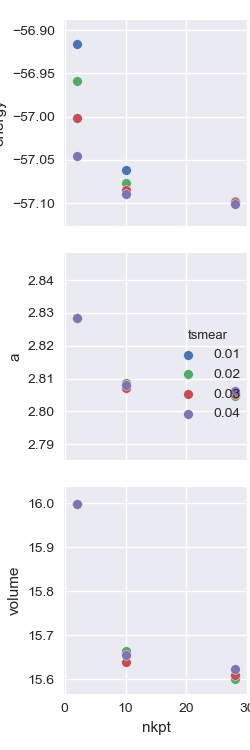

In [24]:
import seaborn as sns
sns.pairplot(data, x_vars="nkpt", y_vars=["energy", "a", "volume"], hue="tsmear");

<IPython.core.display.Javascript object>


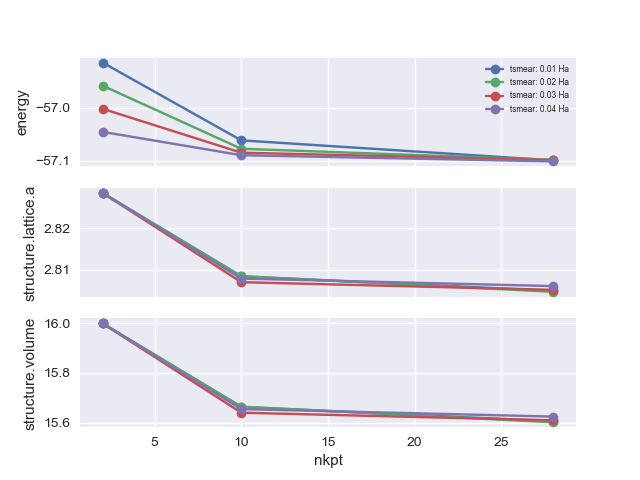

In [21]:
y_vars = ["energy", "structure.lattice.a", "structure.volume"]

robot.plot_convergence_items(y_vars, sortby="nkpt", hue="tsmear");

In [27]:
eframe = robot.get_energyterms_dataframe();
eframe

,energy,e_localpsp,e_eigenvalues,e_ewald,e_hartree,e_corepsp,e_corepspdc,e_kinetic,e_nonlocalpsp,e_entropy,...,e_elecfield,e_magfield,e_fermie,e_sicdc,e_exactX,h0,e_electronpositron,edc_electronpositron,e0_electronpositron,e_monopole
"nkpt: 2, tsmear 0.01",-56.915411,2.250221,9.812825,-74.274296,0.104773,1.030608,0.0,23.699931,12.315701,-0.043378,...,0.0,0.0,6.999314,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"nkpt: 10, tsmear 0.01",-57.061497,2.608616,10.109620,-74.801305,0.118362,1.052701,0.0,23.862361,12.262417,-0.014901,...,0.0,0.0,8.065282,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"nkpt: 10, tsmear 0.04",-57.089434,2.618399,10.102262,-74.814990,0.115344,1.053279,0.0,23.840463,12.274674,-0.025732,...,0.0,0.0,7.953274,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"nkpt: 28, tsmear 0.04",-57.100966,2.658255,10.117732,-74.863162,0.112293,1.055315,0.0,23.830362,12.279799,-0.012806,...,0.0,0.0,7.925121,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"nkpt: 28, tsmear 0.01",-57.099069,2.672114,10.133064,-74.893370,0.114182,1.056593,0.0,23.840806,12.279633,0.001578,...,0.0,0.0,7.839208,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"nkpt: 2, tsmear 0.02",-56.958789,2.250221,9.812825,-74.274296,0.104773,1.030608,0.0,23.699931,12.315701,-0.086756,...,0.0,0.0,7.076028,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"nkpt: 10, tsmear 0.02",-57.077312,2.609655,10.103131,-74.799727,0.116554,1.052635,0.0,23.850802,12.267533,-0.026939,...,0.0,0.0,8.042474,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"nkpt: 28, tsmear 0.02",-57.098237,2.680294,10.138399,-74.899543,0.113118,1.056854,0.0,23.841860,12.278827,0.001695,...,0.0,0.0,7.871541,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"nkpt: 2, tsmear 0.03",-57.002167,2.250221,9.812825,-74.274296,0.104773,1.030608,0.0,23.699931,12.315701,-0.130134,...,0.0,0.0,7.152743,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"nkpt: 10, tsmear 0.03",-57.084682,2.630858,10.113372,-74.838142,0.116200,1.054257,0.0,23.846136,12.274939,-0.011205,...,0.0,0.0,7.980521,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


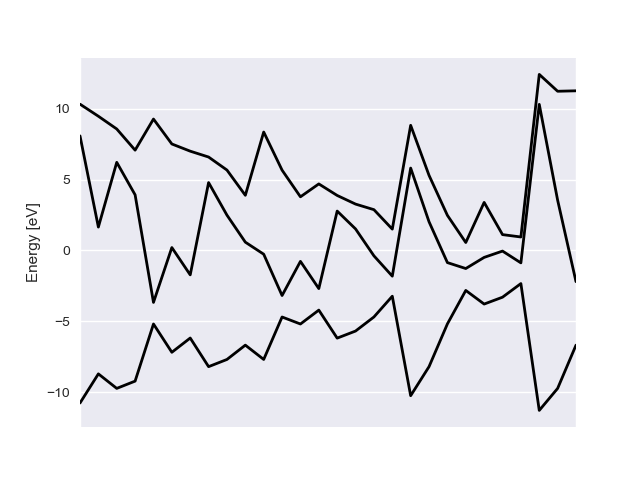

In [25]:
with abilab.abiopen("flow_al_relax_tsmear_nkpt/w0/t11/outdata/out_GSR.nc") as gsr:
    ebands_w0t11 = gsr.ebands

ebands_w0t11.plot();

<IPython.core.display.Javascript object>


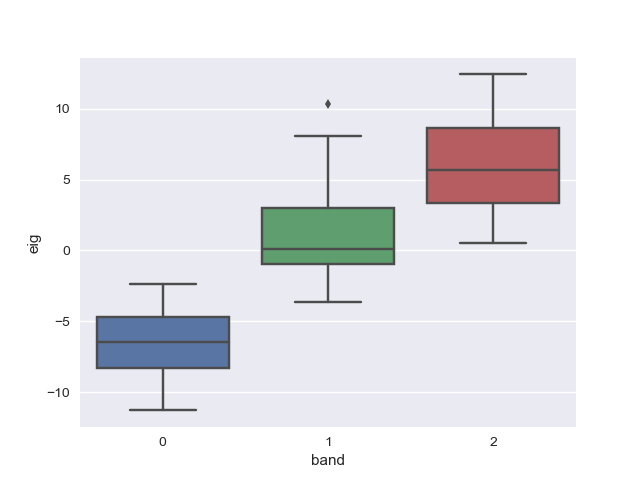

In [19]:
ebands_w0t11.boxplot();

Now you might ask yourself: "The total energy with nkpt == 2 is clearly not converged wrt tsmear. What are the effects of the smearing on the KS eigenvalues for nkpt == 2?"
The `GsrRobot` can construct an `ElectronBandsPlotter` that allows us to compare multiple band structures 
so it's just a matter of telling the robot that we want a plotter object in which only the
`GSR` files with only two k-points in the IBZ, then we can use the plotter to visualize the results: 

<IPython.core.display.Javascript object>


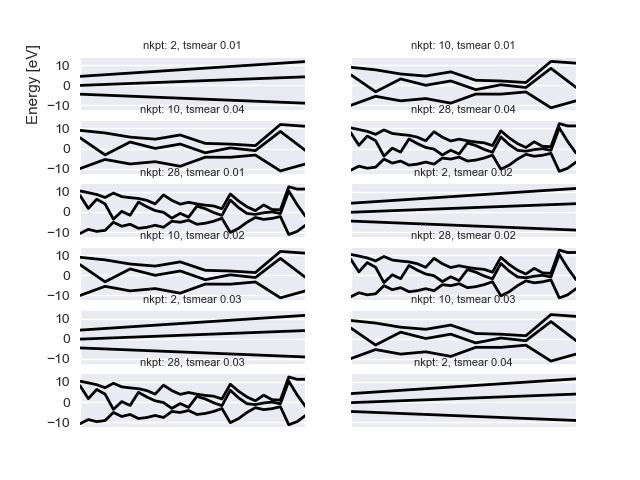

In [20]:
plotter = robot.get_ebands_plotter()
plotter.gridplot();

<IPython.core.display.Javascript object>


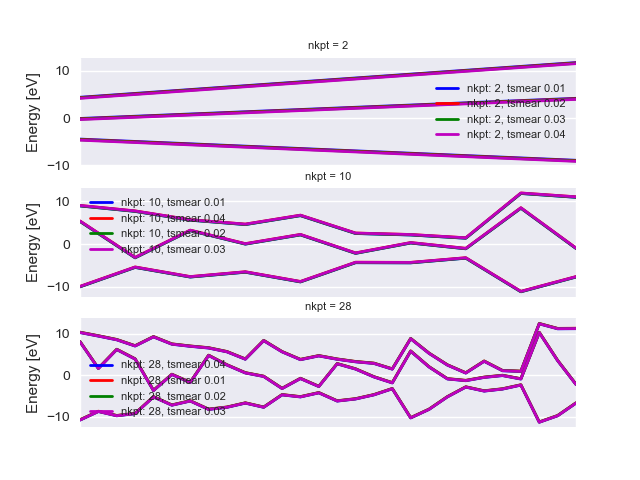

In [23]:
robot.gridplot_with_hue(hue="nkpt");

The plotter provides different plot methods to visualize the same data.
Perhaps you prefer this:

<IPython.core.display.Javascript object>


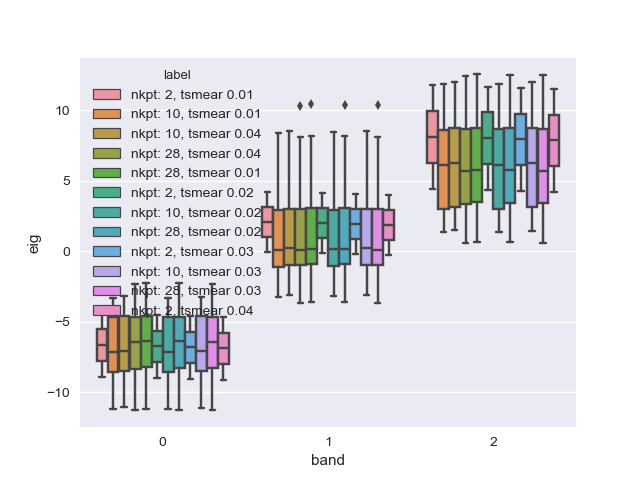

In [21]:
plotter.combiboxplot();

<IPython.core.display.Javascript object>


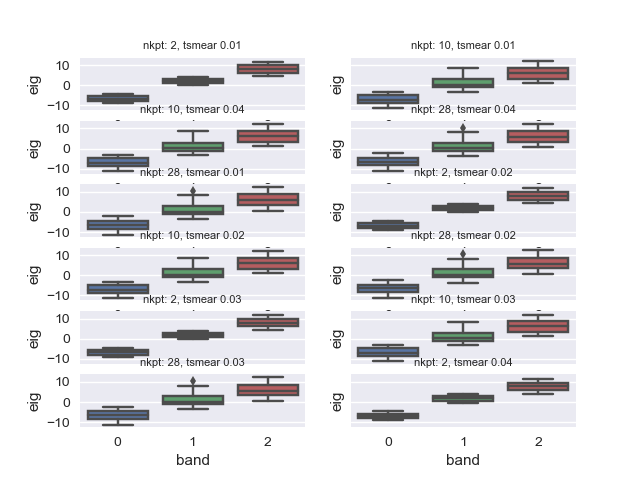

In [22]:
#robot.boxplot_ebands();

<IPython.core.display.Javascript object>


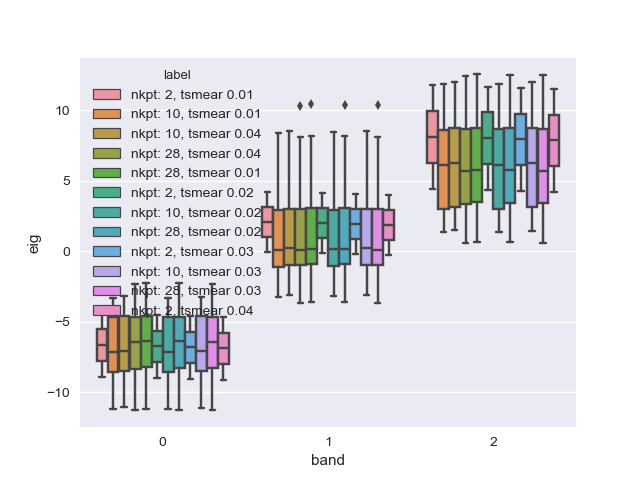

In [23]:
robot.combiboxplot_ebands();

In [24]:
edos_plotter = robot.get_edos_plotter(width=0.1, step=0.2)

<IPython.core.display.Javascript object>


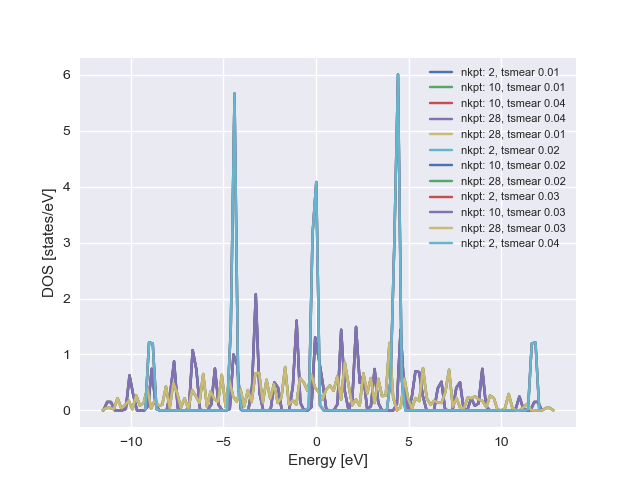

In [25]:
edos_plotter.combiplot();

<IPython.core.display.Javascript object>


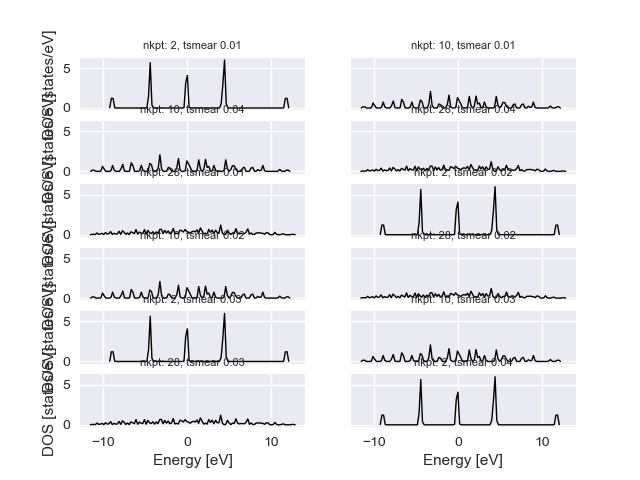

In [26]:
edos_plotter.gridplot();

In [25]:
#e3d = ebands_w0t11.get_ebands3d()
#e3d.plot_isosurfaces()

A logical next lesson would be the the tutorial on 
[phonon calculations with DFPT](https://nbviewer.jupyter.org/github/abinit/abitutorials/blob/master/abitutorials/dfpt/lesson_dfpt.ipynb)

Back to the main [Index](../index.ipynb)